[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


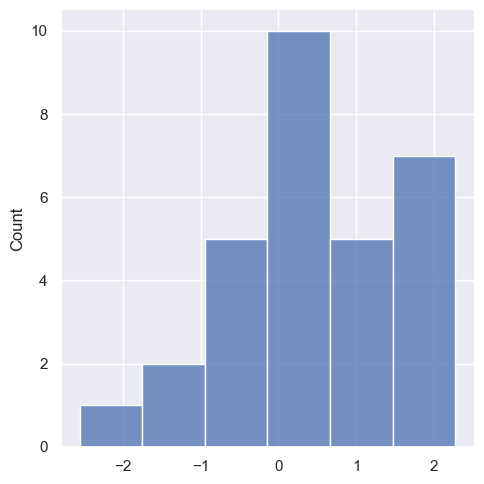

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.displot(x)

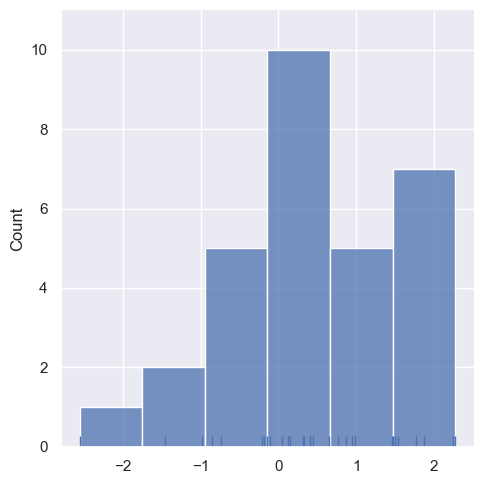

In [6]:
sns.displot(x, rug=True)

<Axes: >

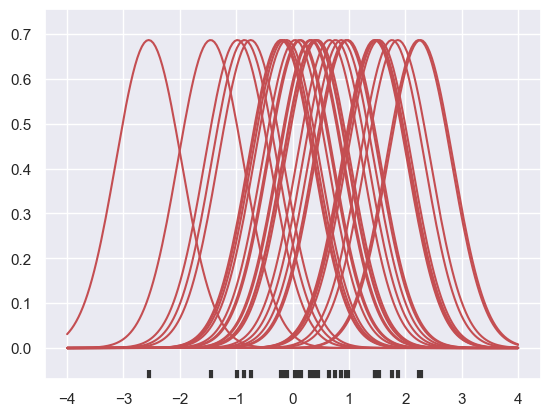

In [8]:
from scipy import stats

bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
  kernel = stats.norm(x_i, bandwidth).pdf(support)
  kernels.append(kernel)
  plt.plot(support, kernel, color='r')

sns.rugplot(x, color='.2', linewidth=3)

In [9]:
from scipy.integrate import trapz  # 각 구간별 y에 대한 적분

density = np.sum(kernels, axis=0)
density.shape

(200,)

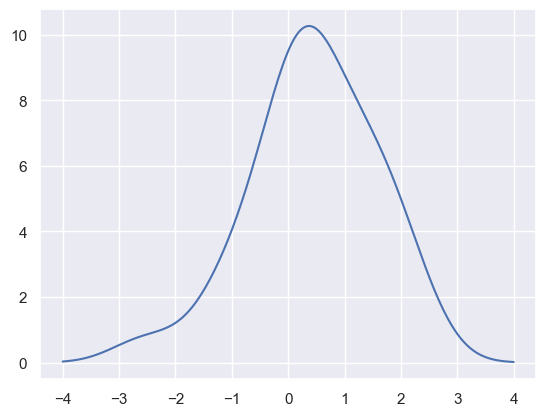

In [10]:
plt.plot(support, density)

<Axes: ylabel='Density'>

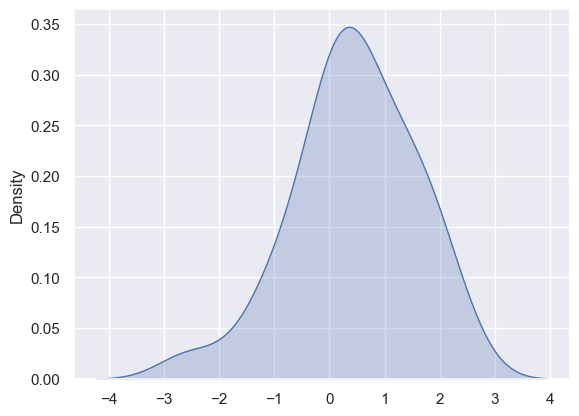

In [11]:
# seaborn의 kdeplot()으로 kde 곡선을 바로 구할 수 있다.
sns.kdeplot(x, shade=True)

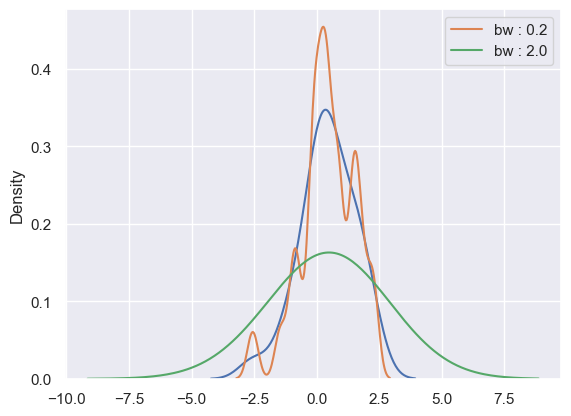

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label='bw : 0.2')
sns.kdeplot(x, bw=2, label='bw : 2.0')
plt.legend()
plt.legend()
plt.show()

### 사이킷런의 MeanShift 사용하기

In [13]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [14]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=0.9)  # bandwidth가 작으면 오밀조밀하게 모여있는 데이터를 하나의 군집으로 삼아 군집이 많아짐
cluster_labels = meanshift.fit_predict(X)

print('클러스터 유형 : {}'.format(np.unique(cluster_labels)))

클러스터 유형 : [0 1 2 3 4 5 6 7]


In [15]:
import pandas as pd
sample_data_df = pd.DataFrame(
  data=X,
  columns=['x1', 'x2']
)
sample_data_df['cluster'] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4


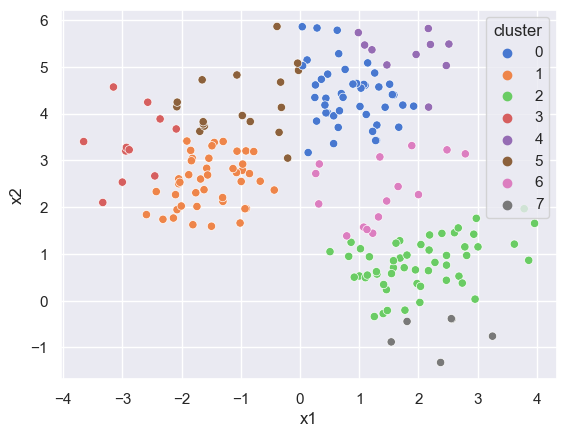

In [16]:
sns.set_theme()
sns.scatterplot(
  x='x1',
  y='x2',
  hue='cluster',
  palette='muted',
  data=sample_data_df
)
plt.show()

In [17]:
# bandwidth 증가
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print('클러스터 유형 : {}'.format(np.unique(cluster_labels)))

클러스터 유형 : [0 1 2]


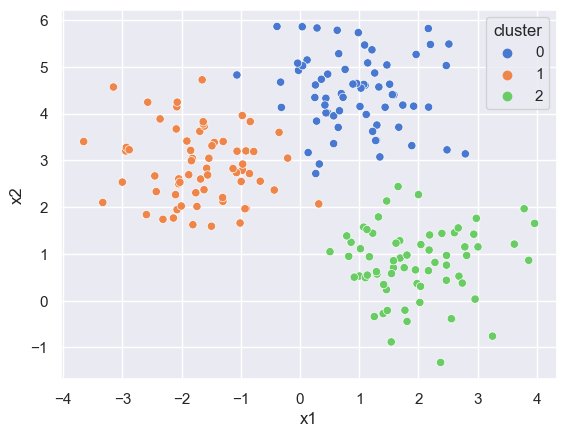

In [18]:
sample_data_df = pd.DataFrame(
  data=X,
  columns=['x1', 'x2']
)
sample_data_df['cluster'] = cluster_labels
sns.scatterplot(
  x='x1',
  y='x2',
  hue='cluster',
  palette='muted',
  data=sample_data_df
)
plt.show()

최적의 bandwidth 구하기

In [19]:
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25)
best_bandwidth

1.6889636737559222

In [20]:
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('클러스터 유형 : {}'.format(np.unique(cluster_labels)))

클러스터 유형 : [0 1 2]


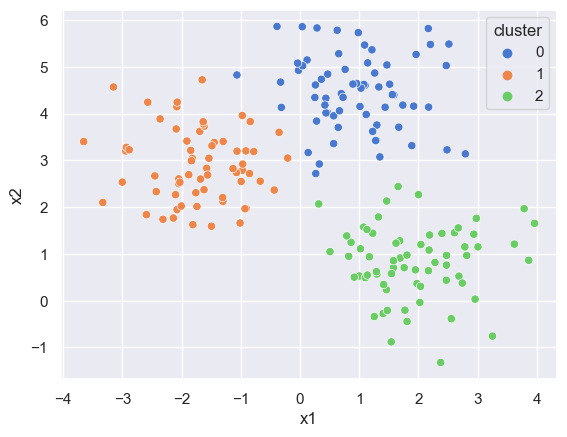

In [21]:
sample_data_df = pd.DataFrame(
  data=X,
  columns=['x1', 'x2']
)
sample_data_df['cluster'] = cluster_labels
sns.scatterplot(
  x='x1',
  y='x2',
  hue='cluster',
  palette='muted',
  data=sample_data_df
)
plt.show()

In [22]:
# centroid 구하기
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])